# Christian Dior & Hermes Returns 

### Get data with daily frequency (01.01.2020 - 17.10.2022)

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import kurtosis
from scipy.stats import skew

In [3]:
# define the tickers symbol
tickerSymbol_CDI = 'CDI.PA'
tickerSymbol_RMS = 'RMS.PA'

# get data on this ticker
# tickerData = yf.Ticker(tickerSymbol_CDI)

# get the historical prices for those two tickers
# df = tickerData.history(period='1d', start='2020-1-1', end='2022-10-17')
df = yf.download([tickerSymbol_CDI,tickerSymbol_RMS], period='1d', start='2020-1-1', end='2022-10-17', 
                 group_by='ticker')
df.head()

#see your data
df

[*********************100%***********************]  2 of 2 completed


RMS.PA                                         \
                                  Open         High          Low        Close   
Date                                                                            
2020-01-02 00:00:00+01:00   670.799988   674.799988   666.200012   671.000000   
2020-01-03 00:00:00+01:00   669.200012   675.400024   667.200012   675.400024   
2020-01-06 00:00:00+01:00   672.599976   673.599976   662.799988   669.799988   
2020-01-07 00:00:00+01:00   672.599976   681.200012   672.599976   678.200012   
2020-01-08 00:00:00+01:00   675.599976   684.599976   674.400024   684.200012   
...                                ...          ...          ...          ...   
2022-10-10 00:00:00+02:00  1247.500000  1264.500000  1229.500000  1248.500000   
2022-10-11 00:00:00+02:00  1246.500000  1263.000000  1228.500000  1261.000000   
2022-10-12 00:00:00+02:00  1265.000000  1300.000000  1263.000000  1284.000000   
2022-10-13 00:00:00+02:00  1280.000000  1280.000000  1196.000000  1254.500000   
2022-10-14 00:00:00+02:00  1276.500000  1306.500000  1250.000000  1274.500000   

                                                    CDI.PA              \
                             Adj Close  Volume        Open        High   
Date                                                                     
2020-01-02 00:00:00+01:00   659.132935   42679  461.600006  464.200012   
2020-01-03 00:00:00+01:00   663.455200   33911  461.000000  463.399994   
2020-01-06 00:00:00+01:00   657.954163   44451  461.200012  461.600006   
2020-01-07 00:00:00+01:00   666.205566   50766  462.799988  466.600006   
2020-01-08 00:00:00+01:00   672.099548   34952  457.200012  463.200012   
...                                ...     ...         ...         ...   
2022-10-10 00:00:00+02:00  1248.500000   51008  598.500000  602.500000   
2022-10-11 00:00:00+02:00  1261.000000   65655  593.000000  597.000000   
2022-10-12 00:00:00+02:00  1284.000000   74063  603.500000  614.500000   
2022-10-13 00:00:00+02:00  1254.500000  130278  608.500000  608.500000   
2022-10-14 00:00:00+02:00  1274.500000   76274  609.000000  624.500000   

                                                                      
                                  Low       Close   Adj Close Volume  
Date                                                                  
2020-01-02 00:00:00+01:00  459.200012  461.799988  440.350922  14531  
2020-01-03 00:00:00+01:00  456.399994  462.799988  441.304474   7986  
2020-01-06 00:00:00+01:00  454.200012  461.200012  439.778809  18007  
2020-01-07 00:00:00+01:00  459.399994  461.200012  439.778809  19399  
2020-01-08 00:00:00+01:00  456.600006  463.200012  441.685883  14214  
...                               ...         ...         ...    ...  
2022-10-10 00:00:00+02:00  588.500000  595.500000  595.500000   5103  
2022-10-11 00:00:00+02:00  586.500000  596.500000  596.500000   3184  
2022-10-12 00:00:00+02:00  600.000000  608.500000  608.500000   6061  
2022-10-13 00:00:00+02:00  581.500000  600.000000  600.000000   8548  
2022-10-14 00:00:00+02:00  601.000000  610.500000  610.500000   3547  

[718 rows x 12 columns]

#### *Visualizing the Close Price for all the stocks*

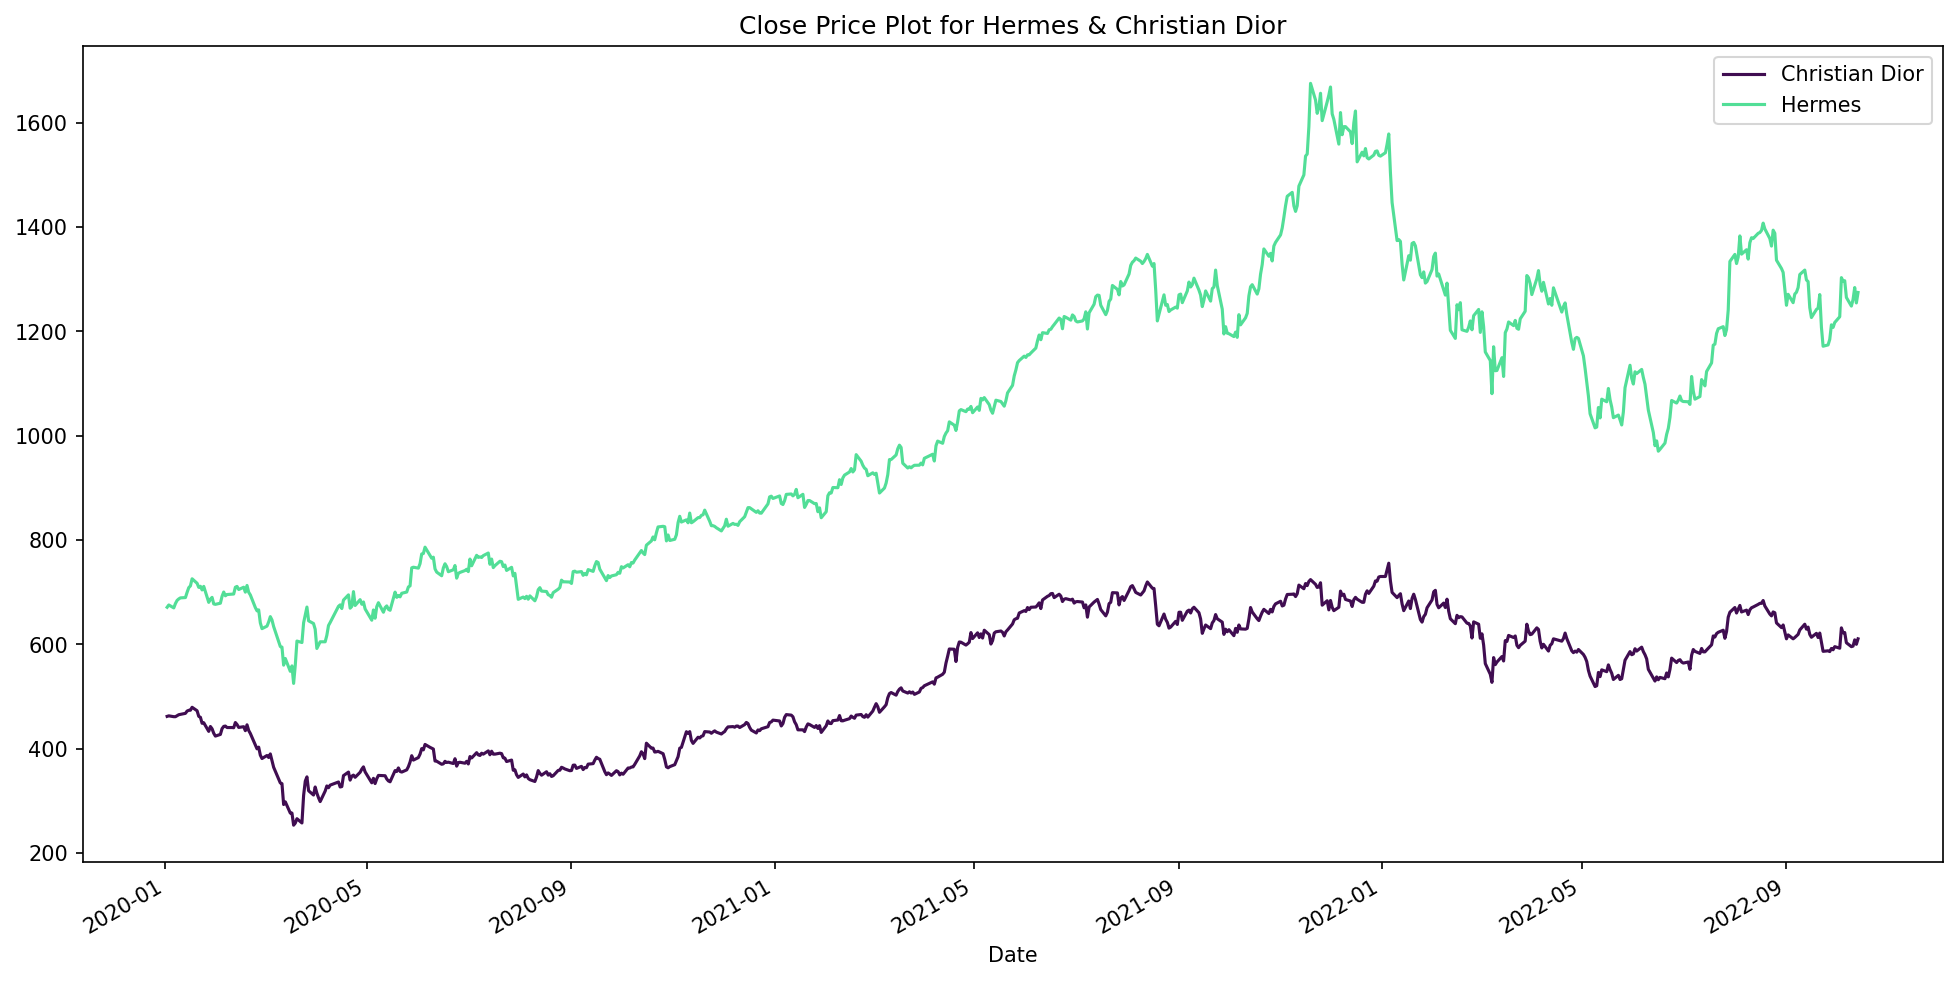

In [4]:
# Visualizing The Close Price of all the stocks
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)

df["CDI.PA"]["Close"].plot(label='Christian Dior', color = '#400D51')
df["RMS.PA"]["Close"].plot(label='Hermes', color='#52DE97')

# adding title to the plot
plt.title('Close Price Plot for Hermes & Christian Dior')
# adding Label to the x-axis
plt.xlabel('Date')
# adding legend to the curve
plt.legend()

### Daily returns for each ticker



Simple return: $R_t=\frac{P_t - P_{t-1}}{P_{t-1}}$

Log-return: $r_t = \log\left(\frac{P_t}{P_{t-1}}\right)=\log{P_t}-\log{P_{t-1}}$

In [5]:
# Christian Dior
close_CDI = df["CDI.PA"]["Close"]
simple_return_CDI = close_CDI.pct_change()
log_return_CDI = np.log(1+simple_return_CDI)

# Hermes
close_RMS = df["RMS.PA"]["Close"]
simple_return_RMS = close_RMS.pct_change()
log_return_RMS = np.log(1+simple_return_RMS)

#### SIMPLE RETURN

#### *1. Graphs*

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


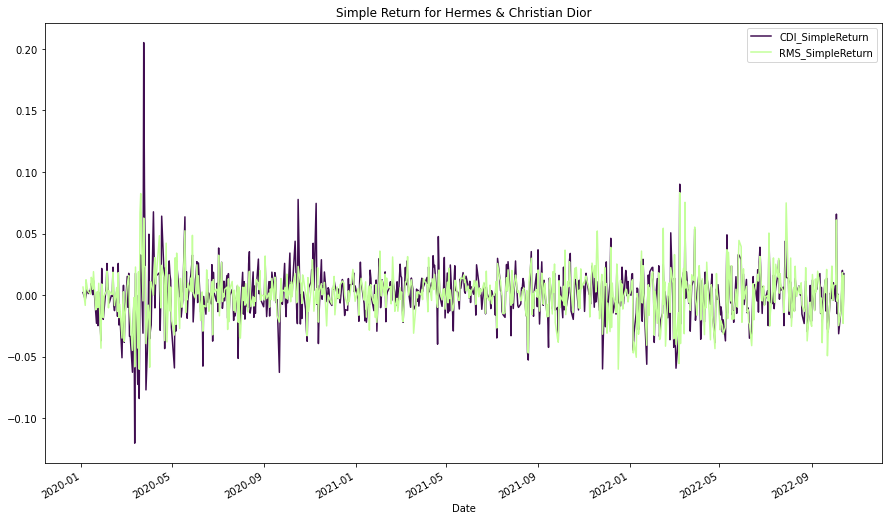

In [6]:
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots

simple_return_CDI.plot(label = "CDI_SimpleReturn", color = '#400D51')# Plot the lsimple return
simple_return_RMS.plot(label = "RMS_SimpleReturn", color='#C3FF99')

# adding title to the plot
plt.title('Simple Return for Hermes & Christian Dior')
# adding Label to the x-axis
plt.xlabel('Date')
# adding legend to the curve
plt.legend()

#### *2. Histogram*

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


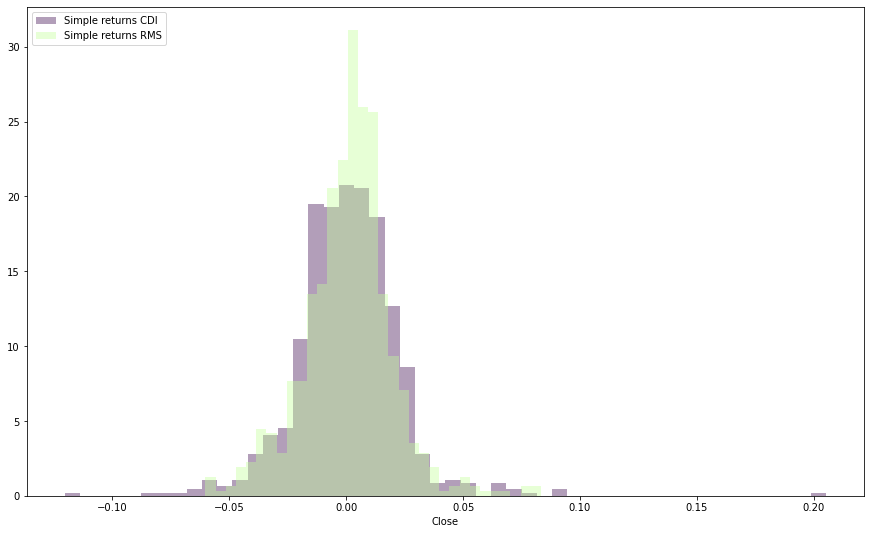

In [7]:
sns.distplot(simple_return_CDI, kde=False, norm_hist=True, label='Simple returns CDI', color = '#400D51')  
sns.distplot(simple_return_RMS, kde=False, norm_hist=True, label='Simple returns RMS', color='#C3FF99')  
legend(loc='upper left');
plt.show()

#### *3. Descriptive Statistics*

##### *3.1. Christian Dior -> Simple Return*

In [8]:
simple_return_CDI.describe()

count    717.000000
mean       0.000641
std        0.022543
min       -0.120192
25%       -0.011895
50%        0.001410
75%        0.012520
max        0.205128
Name: Close, dtype: float64

##### *3.2. Hermes -> Simple Return*

In [8]:
simple_return_RMS.describe()

count    717.000000
mean       0.001075
std        0.018980
min       -0.060150
25%       -0.008658
50%        0.002559
75%        0.011039
max        0.083295
Name: Close, dtype: float64

#### LOG RETURN

#### *1. Graphs*

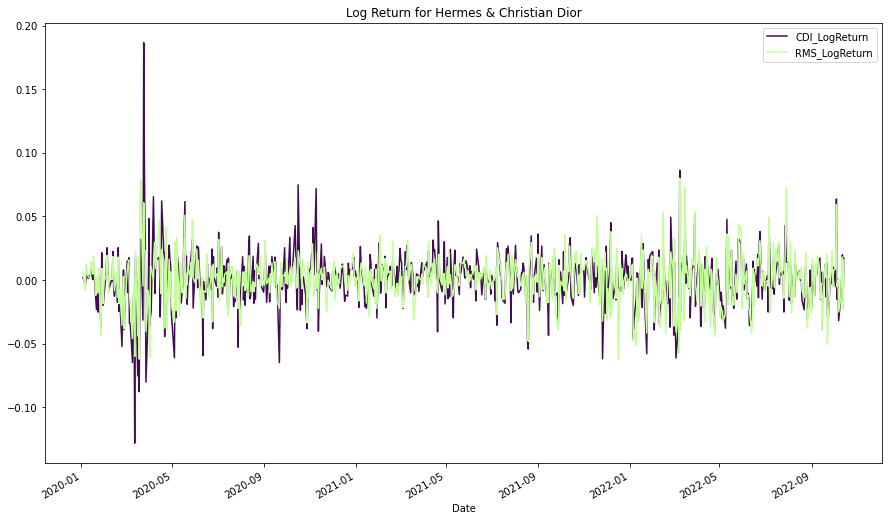

In [9]:
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots

log_return_CDI.plot(label = "CDI_LogReturn", color = '#400D51')# Plot the lsimple return
log_return_RMS.plot(label = "RMS_LogReturn", color='#C3FF99')

plt.title('Log Return for Hermes & Christian Dior')
plt.xlabel('Date')
plt.legend()

#### *2. Histogram*

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


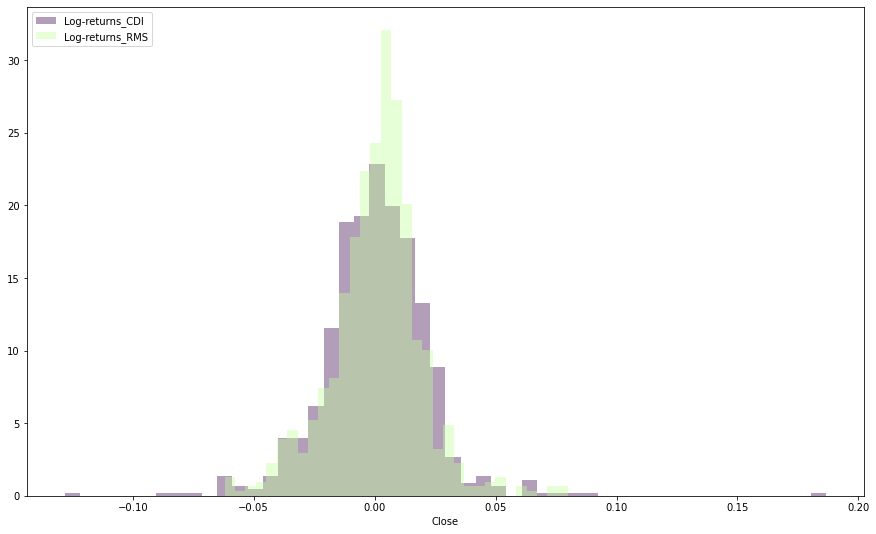

In [10]:
sns.distplot(log_return_CDI, kde=False, norm_hist=True,label='Log-returns_CDI', color = '#400D51') 
sns.distplot(log_return_RMS, kde=False, norm_hist=True,label='Log-returns_RMS', color='#C3FF99') 
legend(loc='upper left');
plt.show()

#### *3. Descriptive Statistics*

##### *3.1. Christian Dior -> Log Return*

In [11]:
log_return_CDI.describe()

count    717.000000
mean       0.000389
std        0.022377
min       -0.128052
25%       -0.011967
50%        0.001409
75%        0.012442
max        0.186586
Name: Close, dtype: float64

##### *3.2. Hermes -> Log Return*

In [12]:
log_return_RMS.describe()

count    717.000000
mean       0.000895
std        0.018950
min       -0.062035
25%       -0.008696
50%        0.002555
75%        0.010979
max        0.080007
Name: Close, dtype: float64

##### Asymmetry for close price 

###### Christian Dior

In [9]:
skew(close_CDI)

nan

In [14]:
kurtosis(close_CDI)

-1.393676551431172

###### Hermes

In [15]:
skew(close_RMS)

0.1622592893931238

In [16]:
kurtosis(close_RMS)

-1.0599043936179786